# Importing data with pandas and plotting it using matplotlib (a clast count example)

## Import function libraries

In order to use the functions associated with matplotlib and pandas, we need to import them which is done in the code cell below. The convention is to import them using shortened code names (e.g. pd for pandas; plt for matplotlib.pyplot).

```pandas``` is a widely used data analysis library that has tools for importing and manipulating data. The central component of pandas is the DataFrame object which is an indexed tabular data structure.

```matplotlib``` is a widely used library that enables data visualization (it makes plots).

```sns``` is a Python data visualization library built on top of matplotlib that provides shortcuts to make nice looking and informative statistical graphics from pandas DataFrames. https://seaborn.pydata.org/examples/index.html

In [148]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns

## Import our data

Our clast data is currently within a Google Sheet. We can specify the sheet_id and read in the data directly from Google Sheets. Note that the sheet name can not have any spaces in it (as urls can not have spaces; although spaces can be specified with %20). The code cell below creates a url that points to our Google sheet.

In [149]:
sheet_id = '1fmdBNM1kJn2DvIjiD4CTMctHbg45v_i3ZcIdH3XTHfg'
sheet_name = 'Nick_diorite_protrusion'
protrusion_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
print(protrusion_url)

https://docs.google.com/spreadsheets/d/1fmdBNM1kJn2DvIjiD4CTMctHbg45v_i3ZcIdH3XTHfg/gviz/tq?tqx=out:csv&sheet=Nick_diorite_protrusion


Now that the url is specified, we can read the data and import it as a pandas dataframe with the code ```pd.read_csv(url)```. We will create a dataframe with the name diorite_protrusions. The Jupyter notebook will show us the header (first 5 rows) and the footer (last 5 rows) of the dataframe>

In [150]:
diorite_protrusions = pd.read_csv(protrusion_url)
diorite_protrusions

,team name,moraine,protrusion depth (cm)
0,Nick,younger,3.5
1,Nick,younger,1.0
2,Nick,younger,0.8
3,Nick,younger,1.2
4,Nick,younger,1.1
...,...,...,...
75,Nick,older,5.0
76,Nick,older,4.2
77,Nick,older,6.3
78,Nick,older,4.0


## Summarize our data

Each pandas dataframe column can be referred to by using the syntax:

```data_frame_name['column_name']```

In addition, pandas will summarize the data if we apply the function ```.describe()``` to our column of data.

Let's get the summary statistics associated with the data in the ```'protrusion depth (cm)'``` column:

In [151]:
 diorite_protrusions['protrusion depth (cm)'].describe(include='all')

count    80.000000
mean      2.906250
std       2.757973
min       0.300000
25%       1.075000
50%       1.900000
75%       3.650000
max      14.000000
Name: protrusion depth (cm), dtype: float64

We want to be able make a comparison between the diorite protrusion length in the younger moraine vs. the older moraine. Pandas provides ways to filter data. There is a column called ```moraine```. We can say that we just want to see the rows of the dataframe where 'younger' is the value in the  ```moraine``` column and call that ```diorite_young``` and vice versa for ```diorite_old```.

In [152]:
diorite_young = diorite_protrusions[diorite_protrusions['moraine'] == 'younger']
diorite_old = diorite_protrusions[diorite_protrusions['moraine'] == 'older']

We can now calculate the summary statistics for young and then old

In [153]:
diorite_young['protrusion depth (cm)'].describe(include='all')

count    39.000000
mean      1.379487
std       1.092120
min       0.300000
25%       0.700000
50%       1.100000
75%       1.500000
max       5.100000
Name: protrusion depth (cm), dtype: float64

In [154]:
diorite_old['protrusion depth (cm)'].describe(include='all')

count    41.000000
mean      4.358537
std       3.074896
min       0.300000
25%       2.100000
50%       3.400000
75%       5.800000
max      14.000000
Name: protrusion depth (cm), dtype: float64

## Visualize our data

We can use seaborn to visualize our data. For example, we can draw a scatterplot where one variable is categorical called a swarmplot to show all of our measurements. We can define the x values on the plot to be the protrusion depth putting ```x="protrusion depth (cm)"```, can make y be categorized by the moraine categories with ```y="moraine"```, and need to specify that the dataframe is diorite_protrusions with ```data=diorite_protrusions```.

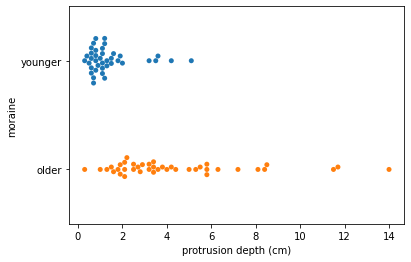

In [155]:
sns.swarmplot(x="protrusion depth (cm)", y="moraine", data=diorite_protrusions)
plt.show()

We can combine the swarmplot with a box and whisker plot which that shows the 25 percentile, 50 percentile (median), and 75 percentile with the box and has whiskers that show the full range.

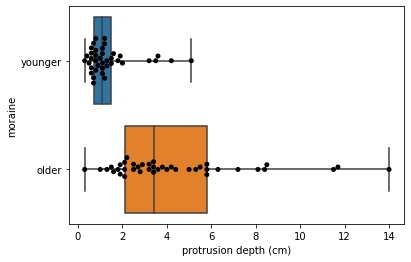

In [156]:
sns.boxplot(x="protrusion depth (cm)", y="moraine", data=diorite_protrusions,whis=[0,100])
sns.swarmplot(x="protrusion depth (cm)", y="moraine", data=diorite_protrusions,color="black")
plt.show()

Alternatively, we could plot histograms of the data:

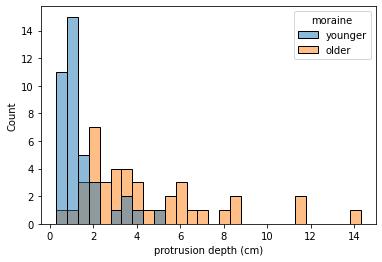

In [172]:
sns.histplot(data=diorite_protrusions, x="protrusion depth (cm)", hue="moraine", binwidth=0.5)
plt.show()

Or visualize the data using a kernel density function. kdeplots display information in a similar way than histograms, though a Gaussian kernel is used to produce a smoothed line corresponding to observations count:

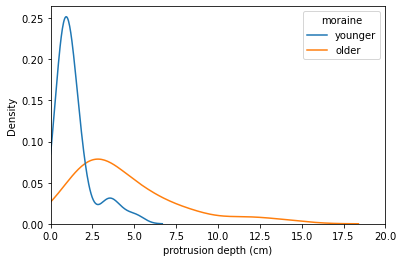

In [158]:
sns.kdeplot(data=diorite_protrusions, x="protrusion depth (cm)", hue="moraine",
            clip=(0, None))
plt.xlim(0,20)
plt.show()

## Your turn!

Use the code examples above and 

In [159]:
sheet_id = '1fmdBNM1kJn2DvIjiD4CTMctHbg45v_i3ZcIdH3XTHfg'
sheet_name = 'combined_clasts'
clasts_url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

In [160]:
combined_clasts = pd.read_csv(clasts_url)
for n in combined_clasts.index:
    if combined_clasts['x (cm)'][n]<combined_clasts['y (cm)'][n]:
        combined_clasts['x (cm)'][n] = combined_clasts['y (cm)'][n]
        combined_clasts['y (cm)'][n] = combined_clasts['x (cm)'][n]
combined_clasts

,team name,moraine,# Clast,x (cm),y (cm),z (cm),litho,detail,physical weathering,chemical weathering,Notes,protrusion,protrusion depth (cm)
0,Tioga,younger,1,62.0,56.0,31.0,metasedimentary,slate,exfoliation,oxidation,NaN,NaN,NaN
1,Tioga,younger,2,7.0,6.0,NaN,igneous,granodiorite,NaN,oxidation,NaN,NaN,NaN
2,Tioga,younger,3,15.0,9.0,6.5,metasedimentary,slate,exfoliation,oxidation,NaN,NaN,NaN
3,Tioga,younger,4,20.0,20.0,12.0,metasedimentary,marble,jointing,NaN,NaN,NaN,NaN
4,Tioga,younger,5,19.0,11.0,17.0,igneous,granodiorite,jointing,NaN,part of split/sheared boulder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Fault scrap,older,46,12.0,8.0,4.0,igneous,granodiorite,NaN,NaN,"high, oxidation",No,NaN
296,Fault scrap,older,47,18.0,12.0,NaN,igneous,granodiorite,NaN,NaN,moderate,No,NaN
297,Fault scrap,older,48,235.0,144.0,30.0,igneous,granodiorite,NaN,NaN,moderate,Yes,1.0
298,Fault scrap,older,49,26.0,18.0,11.0,igneous,diorite,NaN,NaN,"low, oxidation",No,NaN
